In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the car speed file
car_speed_file_path = 'car1_speed.csv'
car_speed_df = pd.read_csv(car_speed_file_path)

# Display the first few rows to understand the data structure
car_speed_df.head()

,Timestamp,Speed
0,1,0.00000
1,2,1.48467
2,3,3.51581
3,4,4.37904
4,5,3.79672


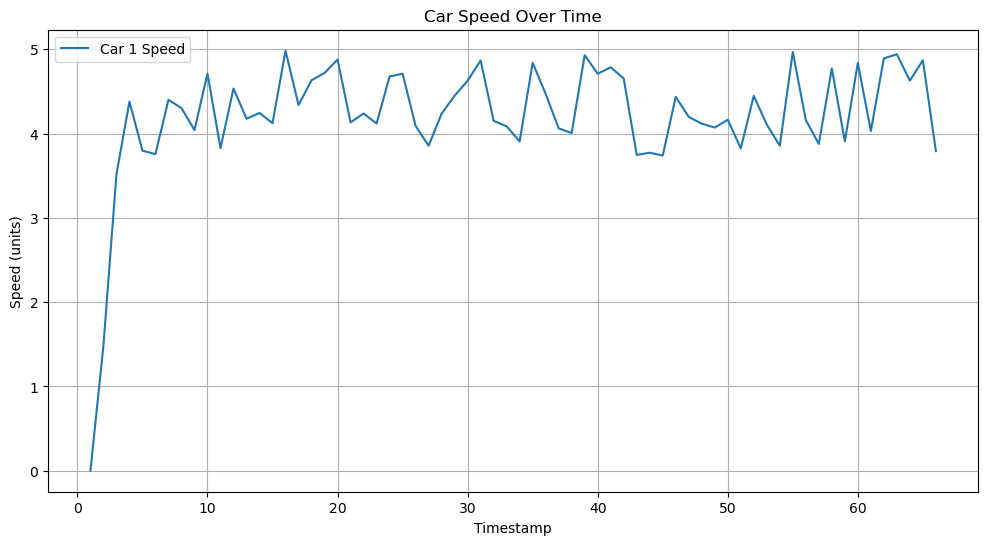

In [3]:
# Plotting the car's speed over time
plt.figure(figsize=(12, 6))
plt.plot(car_speed_df['Timestamp'], car_speed_df['Speed'], label="Car 1 Speed")
plt.title('Car Speed Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Speed (units)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import pandas as pd

with open('message_exchange.csv', 'r') as f:
    lines = f.read().splitlines()

data = []

for line in lines[1:]:  # Skip the first line
    fields = line.split(',')
    carId = fields[0]
    rsuId = fields[1]
    messageCount = int(fields[2])
    timestamps = list(map(int, fields[3:]))
    data.append([carId, rsuId, messageCount, timestamps])

df = pd.DataFrame(data, columns=['CarId', 'RSUId', 'MessageCount', 'Timestamps'])

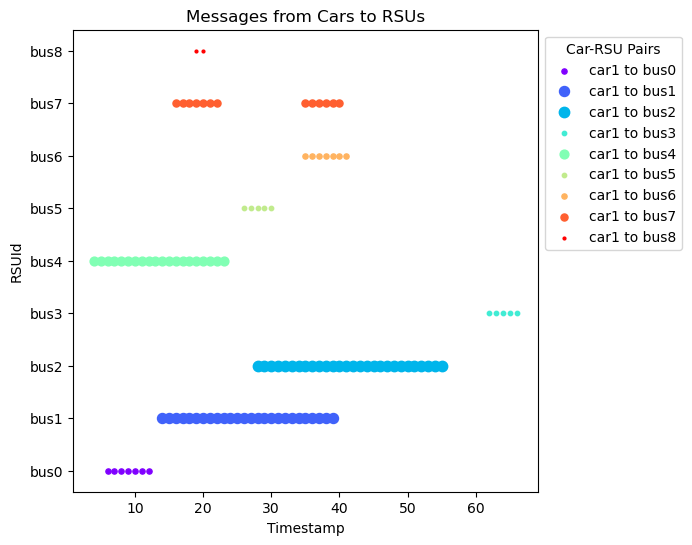

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a color map to assign a unique color to each car-RSU pair
colors = cm.rainbow(np.linspace(0, 1, len(df)))

plt.figure(figsize=(6, 6))

for color, (_, row) in zip(colors, df.iterrows()):
    carId = row['CarId']
    rsuId = row['RSUId']
    timestamps = row['Timestamps']
    messageCount = row['MessageCount']

    # Create a scatter plot with one point for each timestamp
    plt.scatter(timestamps, [rsuId]*len(timestamps), s=messageCount*2, color=color, label=f'{carId} to {rsuId}')
    
plt.title('Messages from Cars to RSUs')
plt.xlabel('Timestamp')
plt.ylabel('RSUId')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Car-RSU Pairs')
plt.show()

In [21]:
import pandas as pd

with open('message_exchange_2.csv', 'r') as f:
    lines = f.read().splitlines()

data = []

for line in lines[1:]:  # Skip the first line
    fields = line.split(',')
    carId = fields[0]
    rsuId = fields[1]
    messageCount = int(fields[2])
    timestamps = list(map(int, fields[3:]))
    data.append([carId, rsuId, messageCount, timestamps])

df = pd.DataFrame(data, columns=['CarId', 'RSUId', 'MessageCount', 'Timestamps'])

In [23]:
from collections import defaultdict
# Dictionary to store the unique interactions of each entity (including RSUs)
all_interactions = defaultdict(lambda: defaultdict(list))

# Iterate through the DataFrame to extract interactions
for _, row in df.iterrows():
    entity1 = row['CarId']
    entity2 = row['RSUId']
    timestamps = row['Timestamps']

    # Store interactions in both directions
    all_interactions[entity1][entity2].extend(timestamps)
    all_interactions[entity2][entity1].extend(timestamps)

# Identify entities that interact with more than one other entity (potential RSUs)
potential_rsu_ids = [key for key, value in all_interactions.items() if len(value) > 1]

# Extract interactions between potential RSUs
rsu_interactions = {rsu_id: {key: value for key, value in all_interactions[rsu_id].items() if key in potential_rsu_ids} for rsu_id in potential_rsu_ids}

# Display a sample of the extracted interactions
rsu_interactions_sample = {key: {k: v[:5] for k, v in value.items()} for key, value in list(rsu_interactions.items())[:3]}
rsu_interactions_sample


AttributeError: 'dict' object has no attribute 'head'